# A few notes on time series data
- See more here https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [36]:
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
# We have here google stock data 
- 

In [24]:
df = pd.read_csv('GOOG.csv')

In [5]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
## Coding date columns

In [ ]:
pd.to_datetime('2018-01-15 3:45pm')
pd.to_datetime('7/8/1952')

In [ ]:
## Change the date column type

In [25]:
df['Date'] = pd.to_datetime(df.Date)
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [19]:
df.set_index('Date',inplace=True)

In [ ]:
## various time functions

In [30]:
df['weekday_name'] = pd.DatetimeIndex(df['Date']).day_name()
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

In [32]:
df.set_index('Date',inplace=True)


In [ ]:
# partial  string indexing

In [49]:
df.loc['2016']
df.loc['2016-01']
df.loc['2016-01' : '2017-02']

,Open,High,Low,Close,Adj Close,Volume,weekday_name,year,month
Date,,,,,,,,,
2016-01-04,743.000000,744.059998,731.257996,741.840027,741.840027,3272800,Monday,2016,1
2016-01-05,746.450012,752.000000,738.640015,742.580017,742.580017,1950700,Tuesday,2016,1
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,Wednesday,2016,1
2016-01-07,730.309998,738.500000,719.059998,726.390015,726.390015,2963700,Thursday,2016,1
2016-01-08,731.450012,733.229980,713.000000,714.469971,714.469971,2450900,Friday,2016,1
2016-01-11,716.609985,718.854980,703.539978,716.030029,716.030029,2090600,Monday,2016,1
2016-01-12,721.679993,728.750000,717.317017,726.070007,726.070007,2024500,Tuesday,2016,1
2016-01-13,730.849976,734.739990,698.609985,700.559998,700.559998,2501700,Wednesday,2016,1
2016-01-14,705.380005,721.924988,689.099976,714.719971,714.719971,2225800,Thursday,2016,1


In [ ]:
#resampling
df.asfreq('D')
df.asfreq('B')

## lag functions
- We can move a series forward or backward in time using lagged variables
- `shift()` moves forward or backward for a defined period 
-https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html#pandas.Series.shift

-`.diff()` Get difference between sucessive rows, can also define a period
- `.pct_change(periods=...)` gives the percentage change between successive rows


In [52]:
df['high_lag_1'] = df['High'].shift()
df[['High','high_lag_1']].head()

,High,high_lag_1
Date,,
2004-08-19,51.835709,NaN
2004-08-20,54.336334,51.835709
2004-08-23,56.528118,54.336334
2004-08-24,55.591629,56.528118
2004-08-25,53.798351,55.591629


In [ ]:
# the series has been shifted in time
- We could take the difference of the two rows get the relative daily change
- `diff` also does that automatically

In [58]:
print((df['high_lag_1'] - df['High']).head())
df['High'].diff().head()

Date
2004-08-19         NaN
2004-08-20   -2.500625
2004-08-23   -2.191784
2004-08-24    0.936489
2004-08-25    1.793278
dtype: float64


Date
2004-08-19         NaN
2004-08-20    2.500625
2004-08-23    2.191784
2004-08-24   -0.936489
2004-08-25   -1.793278
Name: High, dtype: float64

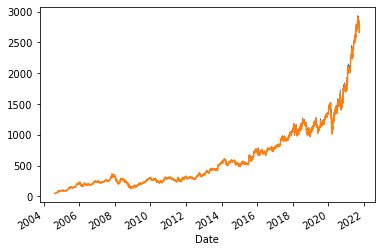

In [39]:

df['High'].plot(linewidth=0.5)
df['Low'].plot()
plt.show()

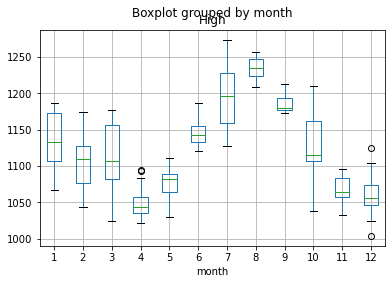

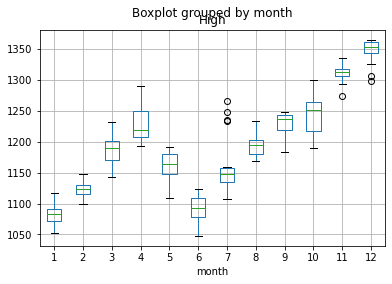

In [47]:
df.query("year == 2018").boxplot(by='month', column=['High'])
df.query("year == 2019").boxplot(by='month', column=['High'])

plt.show()